## Keras practica

El principal bloque de construcción de keras es un modelo, llamado secuencial, el cual es un proceso lineal (una pila) de capa de redes neuronales.

El siguiente fragmento de código define una sola capa con 12 neuronas y espera 8 variables de entrada:

In [13]:
from keras.models import Sequential
from keras.layers import Activation, Dense
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
model = Sequential()
model.add(Dense(12, input_dim=8, kernel_initializer='random_uniform'))

Instructions for updating:
Colocations handled automatically by placer.


Como primer ejemplo crearemos una red neuronal que aprenda a dividir dos grupos de conjuntos:

In [14]:
from sklearn.datasets import make_blobs

In [15]:
import numpy as np

In [16]:
import matplotlib.pyplot as plt

In [5]:
x, y = make_blobs(n_samples=1000, centers=2, random_state=42)

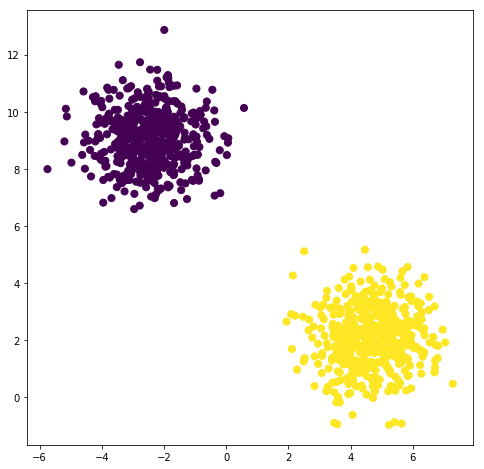

In [6]:
plt.figure(figsize=(8,8))
plt.scatter(x[:, 0], x[:, 1], c=y, s=50);

Con la distribucion de los conjuntos podemos trazar una linea que divida mejor los conjunots, problema que ya repasamos con SVM.Para conocer cual es la mejor linea que divide estos dos conjuntos implementaremos un red neuronal en keras.

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [17]:
from keras.layers import Dense
from keras.optimizers import Adam

El patron general para crear una red neuronal con keras es el siguiente:
- crear el modelo
- agregar capas
- compilar el modelo
- entrenar el modelo
- evaluar el desempeño

In [18]:
#   Simple Sequential model
model = Sequential()

La red es densa, lo que significa que cada neurona en una capa está conectada a todas las neuronas localizadas en la capa anterior y a todas las neuronas en la capa siguiente.

Agregamos una capa Densa con una neurona.Luego configuramos input_shape=(2,), que significa que la entrada de datos corresponde a una matriz de la forma (*,2). La primera dimensión será una dimensión no especificada 
número de lotes (filas) de datos.  La segunda dimensión es 2 que son las posiciones X, Y de cada elemento de datos.

La función de activación sigmoide se utiliza para devolver 0 o 1, lo que significa que los datos del conjunto se utliza para determinar su prediccion en las clases.

para aprender más sobre las funciones de activación visitar el siguiente enlace: https://keras.io/activations/.


In [19]:
model.add(Dense(1, input_shape=(2,), activation="sigmoid"))

cada neurona es inicializada con un especifico peso;<br>
- random_uniform: Weights are initialized to uniformly random small values in (-0.05, 0.05). In other words, any value within the given interval is equally likely to be drawn.
- random_normal: Weights are initialized according to a Gaussian, with a zero mean and small standard deviation of 0.05. For those of you who are not familiar with a Gaussian, think about a symmetric bell curve shape.
- zero: All weights are initialized to zero.


para revisar mas sobre este apartado visitar: https://keras.io/initializations/.


Compilamos el modelo, minimizando la crossentopy para respuesta binarias y maximizando la  precisión.

El optimizador Adam realizara una propagacion hacia atras para ajustar los pesos y los sesgos para minimizar el error durante la fase de entrenamiento.

In [20]:
model.compile(Adam(lr=0.05), 'binary_crossentropy', metrics=['accuracy'])

Algunas funciones de perdida comunes son las siguientes: visitar la página para mayor información:https://keras.io/objectives/)

- MSE: Estas funciones objetivas promedian todos los errores cometidos para cada predicción, y si la predicción está lejos del valor real, entonces esta distancia se hace más evidente por la operación de cuadrado.
- Binary cross-entropy: Esta función de objetivo es adecuada para la predicción de etiquetas binarias.
- Categorical cross-entropy:  Esta función de objetivo es adecuada para la predicción de etiquetas multiclase. También es la opción predeterminada en asociación con la activación de softmax.


Algunas opciones comunes para las métricas (una lista completa de las métricas de Keras se encuentra en https://keras.io/metrics/) son las siguientes:

- Accuracy: This is the proportion of correct predictions with respect to the targets
- Precision: This denotes how many selected items are relevant for a multilabel classification
- Recall: This denotes how many selected items are relevant for a multilabel classification

Las métricas son similares a las funciones objetivas, con la única diferencia de que no se utilizan para entrenar un modelo sino sólo para evaluar un modelo

Entrenamos el modelo con los datos. Determinamos que realice 100 ciclos a traves de los datos. Configurar verbose = 1 para mostrar un mensaje de progreso de la operacion, de otra menra colocar cero para ocultarlo.

épocas: Este es el número de veces que el modelo está expuesto al set de entrenamiento. En cada iteración, el optimizador intenta ajustar los pesos para minimizar la función objetivo.

In [21]:
model.fit(x_train, y_train, epochs=100, verbose=1)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
700/700 [==============================] - 0s 263us/step - loss: 0.0384 - acc: 0.9900
Epoch 2/100
700/700 [==============================] - 0s 23us/step - loss: 0.0029 - acc: 1.0000
Epoch 3/100
700/700 [==============================] - 0s 28us/step - loss: 0.0022 - acc: 1.0000
Epoch 4/100
700/700 [==============================] - 0s 31us/step - loss: 0.0018 - acc: 1.0000
Epoch 5/100
700/700 [==============================] - 0s 34us/step - loss: 0.0016 - acc: 1.0000
Epoch 6/100
700/700 [==============================] - 0s 34us/step - loss: 0.0014 - acc: 1.0000
Epoch 7/100
700/700 [==============================] - 0s 33us/step - loss: 0.0013 - acc: 1.0000
Epoch 8/100
700/700 [==============================] - 0s 33us/step - loss: 0.0011 - acc: 1.0000
Epoch 9/100
700/700 [==============================] - 0s 31us/step - loss: 0.0010 - acc: 1.0000
Epoch 10/100
700/700 [==============================] - 0s 29us/step - loss: 9

700/700 [==============================] - 0s 21us/step - loss: 7.8691e-05 - acc: 1.0000
Epoch 79/100
700/700 [==============================] - 0s 26us/step - loss: 7.6394e-05 - acc: 1.0000
Epoch 80/100
700/700 [==============================] - 0s 26us/step - loss: 7.5242e-05 - acc: 1.0000
Epoch 81/100
700/700 [==============================] - 0s 28us/step - loss: 7.3673e-05 - acc: 1.0000
Epoch 82/100
700/700 [==============================] - 0s 31us/step - loss: 7.2513e-05 - acc: 1.0000
Epoch 83/100
700/700 [==============================] - 0s 22us/step - loss: 7.0999e-05 - acc: 1.0000
Epoch 84/100
700/700 [==============================] - 0s 33us/step - loss: 6.9470e-05 - acc: 1.0000
Epoch 85/100
700/700 [==============================] - 0s 29us/step - loss: 6.8380e-05 - acc: 1.0000
Epoch 86/100
700/700 [==============================] - 0s 31us/step - loss: 6.7675e-05 - acc: 1.0000
Epoch 87/100
700/700 [==============================] - 0s 37us/step - loss: 6.5884e-05 - acc: 

Obtener la perdida y la precisión en los datos de prueba.

In [23]:
eval_result = model.evaluate(x_test, y_test)

300/300 [==============================] - 0s 84us/step


Imprimir la precisión.

In [24]:
print("\n\nTest loss:", eval_result[0], "Test accuracy:", eval_result[1])



Test loss: 8.774678520542996e-06 Test accuracy: 1.0


Ahora trabajaremos con unos datos con otro tipo de distribucion diferente a la anterior que era de tipo lineal, para observar el comportamiento de la red neuronal:

In [25]:
from sklearn.datasets import make_circles
x, y = make_circles(n_samples=1000, factor=.6, noise=0.1, random_state=42)

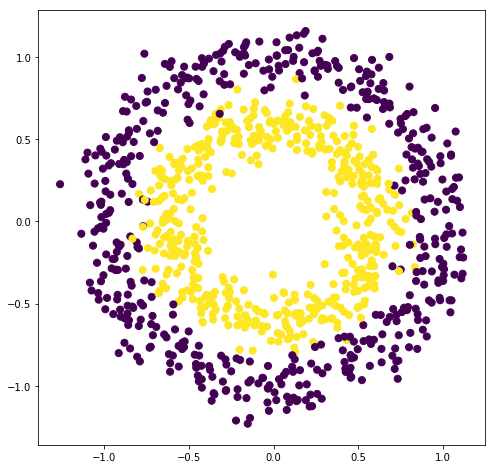

In [26]:
plt.figure(figsize=(8,8))
plt.scatter(x[:, 0], x[:, 1], c=y, s=50);

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [28]:
model.fit(x_train, y_train, epochs=100, verbose=1)
eval_result = model.evaluate(x_test, y_test)
print("\n\nTest loss:", eval_result[0], "Test accuracy:", eval_result[1])

Epoch 1/100
700/700 [==============================] - 0s 24us/step - loss: 0.9142 - acc: 0.4986
Epoch 2/100
700/700 [==============================] - 0s 22us/step - loss: 0.7163 - acc: 0.4800
Epoch 3/100
700/700 [==============================] - 0s 22us/step - loss: 0.6994 - acc: 0.4729
Epoch 4/100
700/700 [==============================] - 0s 25us/step - loss: 0.7031 - acc: 0.4671
Epoch 5/100
700/700 [==============================] - 0s 27us/step - loss: 0.6963 - acc: 0.5786
Epoch 6/100
700/700 [==============================] - 0s 29us/step - loss: 0.6980 - acc: 0.5086
Epoch 7/100
700/700 [==============================] - 0s 33us/step - loss: 0.7022 - acc: 0.4143
Epoch 8/100
700/700 [==============================] - 0s 27us/step - loss: 0.6971 - acc: 0.5414
Epoch 9/100
700/700 [==============================] - 0s 33us/step - loss: 0.6954 - acc: 0.5700
Epoch 10/100
700/700 [==============================] - 0s 32us/step - loss: 0.6966 - acc: 0.4971
Epoch 11/100
700/700 [=======

700/700 [==============================] - 0s 29us/step - loss: 0.6951 - acc: 0.5071
Epoch 84/100
700/700 [==============================] - 0s 24us/step - loss: 0.6952 - acc: 0.4943
Epoch 85/100
700/700 [==============================] - 0s 25us/step - loss: 0.6942 - acc: 0.5029
Epoch 86/100
700/700 [==============================] - 0s 30us/step - loss: 0.6948 - acc: 0.6114
Epoch 87/100
700/700 [==============================] - 0s 27us/step - loss: 0.6948 - acc: 0.5314
Epoch 88/100
700/700 [==============================] - 0s 25us/step - loss: 0.6957 - acc: 0.4414
Epoch 89/100
700/700 [==============================] - 0s 26us/step - loss: 0.6951 - acc: 0.5900
Epoch 90/100
700/700 [==============================] - 0s 23us/step - loss: 0.6982 - acc: 0.5371
Epoch 91/100
700/700 [==============================] - 0s 38us/step - loss: 0.6971 - acc: 0.5071
Epoch 92/100
700/700 [==============================] - 0s 29us/step - loss: 0.6938 - acc: 0.5014
Epoch 93/100
700/700 [===========

Al observar los resultados, se hace necesario crear un modelo mas potente con mas capas y con mayor numero de neuronas, a continuación procedemos a crear mas capas y mas neuronas:

Cuantas capas y neuronas en cada capa son requeridas para nuestra red neuronal, para responder esta pregunta no hay un criterio exacto, pero tenemos una pautas aproximadas que se puede estudiar en el siguiente articulo: https://www.heatonresearch.com/2017/06/01/hidden-layers.html

In [29]:
modelMultiLayer = Sequential()

In [30]:
modelMultiLayer.add(Dense(4,input_shape = (2,), activation = "tanh"))

In [31]:
modelMultiLayer.add(Dense(4,activation = "tanh"))

In [32]:
modelMultiLayer.add(Dense(1,activation = "sigmoid"))

In [33]:
modelMultiLayer.compile(Adam(lr=0.05), 'binary_crossentropy', metrics=['accuracy'])

In [34]:
modelMultiLayer.fit(x_train, y_train, epochs=100, verbose=1)

Epoch 1/100
700/700 [==============================] - 0s 419us/step - loss: 0.7086 - acc: 0.5014
Epoch 2/100
700/700 [==============================] - 0s 28us/step - loss: 0.6910 - acc: 0.5871
Epoch 3/100
700/700 [==============================] - 0s 31us/step - loss: 0.6646 - acc: 0.6086
Epoch 4/100
700/700 [==============================] - 0s 34us/step - loss: 0.6310 - acc: 0.6429
Epoch 5/100
700/700 [==============================] - 0s 27us/step - loss: 0.5839 - acc: 0.7314
Epoch 6/100
700/700 [==============================] - 0s 33us/step - loss: 0.4699 - acc: 0.8386
Epoch 7/100
700/700 [==============================] - 0s 31us/step - loss: 0.3076 - acc: 0.8914
Epoch 8/100
700/700 [==============================] - 0s 29us/step - loss: 0.1964 - acc: 0.9429
Epoch 9/100
700/700 [==============================] - 0s 29us/step - loss: 0.1517 - acc: 0.9486
Epoch 10/100
700/700 [==============================] - 0s 33us/step - loss: 0.2125 - acc: 0.9200
Epoch 11/100
700/700 [======

700/700 [==============================] - 0s 31us/step - loss: 0.0657 - acc: 0.9786
Epoch 85/100
700/700 [==============================] - 0s 26us/step - loss: 0.0937 - acc: 0.9657
Epoch 86/100
700/700 [==============================] - 0s 35us/step - loss: 0.1115 - acc: 0.9657
Epoch 87/100
700/700 [==============================] - 0s 24us/step - loss: 0.0751 - acc: 0.9686
Epoch 88/100
700/700 [==============================] - 0s 34us/step - loss: 0.0633 - acc: 0.9786
Epoch 89/100
700/700 [==============================] - 0s 31us/step - loss: 0.0658 - acc: 0.9786
Epoch 90/100
700/700 [==============================] - 0s 33us/step - loss: 0.0623 - acc: 0.9814
Epoch 91/100
700/700 [==============================] - 0s 34us/step - loss: 0.0683 - acc: 0.9714
Epoch 92/100
700/700 [==============================] - 0s 31us/step - loss: 0.0708 - acc: 0.9743
Epoch 93/100
700/700 [==============================] - 0s 35us/step - loss: 0.0758 - acc: 0.9757
Epoch 94/100
700/700 [===========

In [35]:
eval_result = modelMultiLayer.evaluate(x_test, y_test)

300/300 [==============================] - 0s 203us/step


In [36]:
print("\n\nTest loss:", eval_result[0], "Test accuracy:", eval_result[1])



Test loss: 0.17755417515834174 Test accuracy: 0.9366666674613953


Ahora pasaremos a un ejemplo con datos reales, mediante la construcción de una red neural que pueda reconocer manuscritos de numeros, para lo cual utilizaremos el dataset de MNIST disponible en el siguiente enlace: http://yann.lecun.com/exdb/mnist/).

Keras proporciona una libreria con un conjunto de datos, entre ellos el MNIST, los datos se encuentran tratados y normalizados de [0,1] para trabajar directamente con ellos.

Los algoritmos de aprendizaje profundo esperan que todas las características de entrada varíen de manera similar, e idealmente que tengan una media de 0, y una varianza de 1, es decir los datos se encuentren normalizados. Debemos reescalar nuestros datos para que cumplan con estos requisitos.

In [37]:
from __future__ import print_function
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD
from keras.utils import np_utils

In [40]:
np.random.seed(1671) # for reproducibility

In [41]:
# red y entrenamiento
N_EPOCAS = 200
BATCH_SIZE = 128
VERBOSE = 1
N_CLASSES = 10 # number of outputs = number of digits
OPTIMIZER = SGD() # SGD optimizer, explained later in this chapter
N_CAPAS_OCULTAS = 128
VALIDATION_TEST=0.2 # how much TRAIN is reserved for VALIDATION
RESHAPED = 784

In [42]:
# data: shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
#X_train is 60000 rows of 28x28 values --> reshaped in 60000 x 784RESHAPED = 784

In [43]:
X_train = X_train.reshape(60000, RESHAPED)
X_test = X_test.reshape(10000, RESHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [44]:
# normalizar

In [45]:
X_train /= 255
X_test /= 255

In [46]:
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [47]:
# convertir de variable categorica a numerica, onehotencoding
Y_train = np_utils.to_categorical(y_train, N_CLASSES)
Y_test = np_utils.to_categorical(y_test, N_CLASSES)

In [48]:
modelMnist = Sequential()

In [49]:
modelMnist.add(Dense(N_CLASSES, input_shape=(RESHAPED,)))

In [50]:
modelMnist.add(Activation('softmax'))

In [51]:
modelMnist.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 10)                7850      
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [52]:
modelMnist.compile(loss='categorical_crossentropy', optimizer=OPTIMIZER, metrics=['accuracy'])

In [53]:
modelMnist.fit(X_train, Y_train,batch_size=BATCH_SIZE, epochs=N_EPOCAS, verbose=VERBOSE, validation_split=VALIDATION_TEST)

Train on 48000 samples, validate on 12000 samples
Epoch 1/200
48000/48000 [==============================] - 1s 20us/step - loss: 1.3633 - acc: 0.6796 - val_loss: 0.8904 - val_acc: 0.8246
Epoch 2/200
48000/48000 [==============================] - 1s 17us/step - loss: 0.7913 - acc: 0.8272 - val_loss: 0.6572 - val_acc: 0.8546
Epoch 3/200
48000/48000 [==============================] - 1s 15us/step - loss: 0.6436 - acc: 0.8497 - val_loss: 0.5625 - val_acc: 0.8681
Epoch 4/200
48000/48000 [==============================] - 1s 14us/step - loss: 0.5717 - acc: 0.8602 - val_loss: 0.5098 - val_acc: 0.8765
Epoch 5/200
48000/48000 [==============================] - 1s 16us/step - loss: 0.5276 - acc: 0.8678 - val_loss: 0.4758 - val_acc: 0.8826
Epoch 6/200
48000/48000 [==============================] - 1s 14us/step - loss: 0.4973 - acc: 0.8726 - val_loss: 0.4515 - val_acc: 0.8866
Epoch 7/200
48000/48000 [==============================] - 1s 14us/step - loss: 0.4748 - acc: 0.8775 - val_loss: 0.4333 - 

48000/48000 [==============================] - 1s 17us/step - loss: 0.3143 - acc: 0.9128 - val_loss: 0.3022 - val_acc: 0.9151
Epoch 60/200
48000/48000 [==============================] - 1s 13us/step - loss: 0.3136 - acc: 0.9129 - val_loss: 0.3016 - val_acc: 0.9161
Epoch 61/200
48000/48000 [==============================] - 1s 16us/step - loss: 0.3130 - acc: 0.9133 - val_loss: 0.3011 - val_acc: 0.9158
Epoch 62/200
48000/48000 [==============================] - 1s 15us/step - loss: 0.3123 - acc: 0.9131 - val_loss: 0.3007 - val_acc: 0.9151
Epoch 63/200
48000/48000 [==============================] - 1s 15us/step - loss: 0.3117 - acc: 0.9136 - val_loss: 0.3003 - val_acc: 0.9156
Epoch 64/200
48000/48000 [==============================] - 1s 17us/step - loss: 0.3110 - acc: 0.9137 - val_loss: 0.2997 - val_acc: 0.9158
Epoch 65/200
48000/48000 [==============================] - 1s 13us/step - loss: 0.3105 - acc: 0.9137 - val_loss: 0.2992 - val_acc: 0.9159
Epoch 66/200
48000/48000 [==============

Epoch 118/200
48000/48000 [==============================] - 1s 15us/step - loss: 0.2902 - acc: 0.9192 - val_loss: 0.2846 - val_acc: 0.9212
Epoch 119/200
48000/48000 [==============================] - 1s 17us/step - loss: 0.2900 - acc: 0.9191 - val_loss: 0.2844 - val_acc: 0.9212
Epoch 120/200
48000/48000 [==============================] - 1s 13us/step - loss: 0.2898 - acc: 0.9192 - val_loss: 0.2842 - val_acc: 0.9212
Epoch 121/200
48000/48000 [==============================] - 1s 15us/step - loss: 0.2895 - acc: 0.9191 - val_loss: 0.2841 - val_acc: 0.9212
Epoch 122/200
48000/48000 [==============================] - 1s 13us/step - loss: 0.2892 - acc: 0.9192 - val_loss: 0.2840 - val_acc: 0.9212
Epoch 123/200
48000/48000 [==============================] - 1s 17us/step - loss: 0.2890 - acc: 0.9194 - val_loss: 0.2838 - val_acc: 0.9211
Epoch 124/200
48000/48000 [==============================] - 1s 17us/step - loss: 0.2888 - acc: 0.9197 - val_loss: 0.2837 - val_acc: 0.9210
Epoch 125/200
48000/

48000/48000 [==============================] - 1s 18us/step - loss: 0.2793 - acc: 0.9220 - val_loss: 0.2775 - val_acc: 0.9232
Epoch 177/200
48000/48000 [==============================] - 1s 17us/step - loss: 0.2791 - acc: 0.9219 - val_loss: 0.2774 - val_acc: 0.9234
Epoch 178/200
48000/48000 [==============================] - 1s 18us/step - loss: 0.2790 - acc: 0.9221 - val_loss: 0.2774 - val_acc: 0.9228
Epoch 179/200
48000/48000 [==============================] - 1s 14us/step - loss: 0.2788 - acc: 0.9221 - val_loss: 0.2773 - val_acc: 0.9232
Epoch 180/200
48000/48000 [==============================] - 1s 16us/step - loss: 0.2787 - acc: 0.9221 - val_loss: 0.2771 - val_acc: 0.9235
Epoch 181/200
48000/48000 [==============================] - 1s 18us/step - loss: 0.2785 - acc: 0.9223 - val_loss: 0.2770 - val_acc: 0.9232
Epoch 182/200
48000/48000 [==============================] - 1s 13us/step - loss: 0.2784 - acc: 0.9220 - val_loss: 0.2769 - val_acc: 0.9231
Epoch 183/200
48000/48000 [=======

In [54]:
score = modelMnist.evaluate(X_test, Y_test, verbose=VERBOSE)
print("Test score:", score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 0s 14us/step
Test score: 0.2773858535736799
Test accuracy: 0.9227


Mejorar la red coN capas ocultas, en este caso haremos una pequeña variación con solo 20 epocas.

In [55]:
N_EPOCAS = 20

model = Sequential()
model.add(Dense(N_CAPAS_OCULTAS, input_shape=(RESHAPED,)))
model.add(Activation('relu'))
model.add(Dense(N_CAPAS_OCULTAS))
model.add(Activation('relu'))
model.add(Dense(N_CLASSES))
model.add(Activation('softmax'))
model.summary()
model.compile(loss='categorical_crossentropy',
optimizer=OPTIMIZER,
metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE, epochs=N_EPOCAS, verbose=VERBOSE, validation_split=VALIDATION_TEST)
score = model.evaluate(X_test, Y_test, verbose=VERBOSE)
print("Test score:", score[0])
print('Test accuracy:', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 128)               100480    
_________________________________________________________________
activation_2 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               16512     
_________________________________________________________________
activation_3 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1290      
_________________________________________________________________
activation_4 (Activation)    (None, 10)                0         
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________
Trai

Como se puede apreciar, disminuyendo las epocas y con una capa oculta obtenemos una mejora considerable en el rendimiento y mejora de 2 puntos en la precisión del modelo.

Las redes neuronales tiendes a sufrir de sobreajuste con pocos datos, lo cual imposibilita su generalización. Para abordar este inconveniente podemos utilizar la tecnica Dropout para regularizar los modelos de aprendizaje profundo. Explicaciones en detalle de esta tecnica se encuentran disponible en los siguientes enlaces: https://machinelearningmastery.com/dropout-for-regularizing-deep-neural-networks/, y la implementacion en keras: https://machinelearningmastery.com/how-to-reduce-overfitting-with-dropout-regularization-in-keras/, a continuación procedemos a configurar dropout a nuestro modelo.

In [56]:
from keras.layers.core import Dropout
DROPOUT = 0.3
N_EPOCAS = 50

model = Sequential()
model.add(Dense(N_CAPAS_OCULTAS, input_shape=(RESHAPED,)))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(N_CAPAS_OCULTAS))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(N_CLASSES))
model.add(Activation('softmax'))
model.summary()
model.compile(loss='categorical_crossentropy',
optimizer=OPTIMIZER,
metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE, epochs=N_EPOCAS, verbose=VERBOSE, validation_split=VALIDATION_TEST)
score = model.evaluate(X_test, Y_test, verbose=VERBOSE)
print("Test score:", score[0])
print('Test accuracy:', score[1])

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 128)               100480    
_________________________________________________________________
activation_5 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 128)               16512     
_________________________________________________________________
activation_6 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
___________________________

Epoch 47/50
48000/48000 [==============================] - 2s 35us/step - loss: 0.1873 - acc: 0.9450 - val_loss: 0.1309 - val_acc: 0.9614
Epoch 48/50
48000/48000 [==============================] - 2s 32us/step - loss: 0.1833 - acc: 0.9465 - val_loss: 0.1296 - val_acc: 0.9618
Epoch 49/50
48000/48000 [==============================] - 2s 32us/step - loss: 0.1852 - acc: 0.9449 - val_loss: 0.1286 - val_acc: 0.9627
Epoch 50/50
10000/10000 [==============================] - 0s 28us/step
Test score: 0.12495001666191966
Test accuracy: 0.9609


Optimizador

Si es necesario, puede configurar aún más su optimizador. Un principio básico de Keras es hacer las cosas razonablemente simples, mientras que permite al usuario tener el control total cuando lo necesite (el control final es la fácil extensibilidad del código fuente). Aquí utilizamos SGD (Estocástico de descenso en gradiente) como algoritmo de optimización para nuestras pesas entrenables.

![saddle_point_evaluation_optimizers](img/saddle_point_evaluation_optimizers.gif)

Referencias y agradecimientos especiales:
- Gully A, Pal S. Deep Learning with Keras : Implement various deep-learning algorithms in Keras and see how deep-learning can be used in games.
- Raschka S. Python Machine Learning: Machine Learning and Deep Learning with Python, scikit-learn, and TensorFlow.
- Jerry Kurata: https://twitter.com/jerrykur?lang=es